Reference: https://www.kaggle.com/datasets/dgawlik/nyse/code?datasetId=854&searchQuery=arima

In [133]:
df = pd.read_csv('INTC_daily.csv', index_col=0)
df.sort_values(by=['timestamp'], ascending=[1])
g = df.groupby(df['timestamp'])
g.count().sort_values(by=['volume'], ascending=[1])

,open,high,low,close,volume
timestamp,,,,,
1999-11-01,1,1,1,1,1
2014-10-20,1,1,1,1,1
2014-10-17,1,1,1,1,1
2014-10-16,1,1,1,1,1
2014-10-15,1,1,1,1,1
...,...,...,...,...,...
2007-04-23,1,1,1,1,1
2007-04-20,1,1,1,1,1
2007-04-19,1,1,1,1,1


In [134]:
df = df.sort_values(by=['timestamp'], ascending=[1])
df

,timestamp,open,high,low,close,volume
5641,1999-11-01,77.63,78.31,75.940,76.00,22934100
5640,1999-11-02,77.06,78.19,76.560,77.50,20338200
5639,1999-11-03,78.38,80.69,77.750,79.75,25240100
5638,1999-11-04,80.44,81.75,80.190,81.56,21843500
5637,1999-11-05,82.38,83.88,81.810,82.38,19837200
...,...,...,...,...,...,...
4,2022-03-28,51.36,51.57,50.560,51.51,22932366
3,2022-03-29,52.00,52.29,51.275,52.25,27303707
2,2022-03-30,52.25,52.51,51.220,51.43,24623262
1,2022-03-31,51.20,51.26,49.510,49.56,43698250


In [135]:
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)
df

,timestamp,open,high,low,close,volume
5641,1999-11-01,77.63,78.31,75.940,76.00,22934100
5640,1999-11-02,77.06,78.19,76.560,77.50,20338200
5639,1999-11-03,78.38,80.69,77.750,79.75,25240100
5638,1999-11-04,80.44,81.75,80.190,81.56,21843500
5637,1999-11-05,82.38,83.88,81.810,82.38,19837200
...,...,...,...,...,...,...
4,2022-03-28,51.36,51.57,50.560,51.51,22932366
3,2022-03-29,52.00,52.29,51.275,52.25,27303707
2,2022-03-30,52.25,52.51,51.220,51.43,24623262
1,2022-03-31,51.20,51.26,49.510,49.56,43698250


In [136]:
df = df.drop(['open','high','low','volume'], axis=1)
df

,timestamp,close
5641,1999-11-01,76.00
5640,1999-11-02,77.50
5639,1999-11-03,79.75
5638,1999-11-04,81.56
5637,1999-11-05,82.38
...,...,...
4,2022-03-28,51.51
3,2022-03-29,52.25
2,2022-03-30,51.43
1,2022-03-31,49.56


In [137]:
df_close = df
df_close

,timestamp,close
5641,1999-11-01,76.00
5640,1999-11-02,77.50
5639,1999-11-03,79.75
5638,1999-11-04,81.56
5637,1999-11-05,82.38
...,...,...
4,2022-03-28,51.51
3,2022-03-29,52.25
2,2022-03-30,51.43
1,2022-03-31,49.56


In [138]:

# df_close = df_training.drop(['open','high','low','volume'], axis=1)
df_close.index = df_close['timestamp']
# df_close = df_close['close']
# df_close.index = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S')
df_close = df_close.drop(['timestamp'], axis=1)
df_close

,close
timestamp,
1999-11-01,76.00
1999-11-02,77.50
1999-11-03,79.75
1999-11-04,81.56
1999-11-05,82.38
...,...
2022-03-28,51.51
2022-03-29,52.25
2022-03-30,51.43


In [23]:
type(df)

pandas.core.frame.DataFrame

In [21]:
def check_stationarity(ts_data):
    
    # Rolling statistics
    roll_mean = ts_data.rolling(30).mean()
    roll_std = ts_data.rolling(5).std()
    
    # Plot rolling statistics
    fig = plt.figure(figsize=(20,10))
    plt.subplot(211)
    plt.plot(ts_data, color='black', label='Original Data')
    plt.plot(roll_mean, color='red', label='Rolling Mean(30 days)')
    plt.legend()
    plt.subplot(212)
    plt.plot(roll_std, color='green', label='Rolling Std Dev(5 days)')
    plt.legend()
    
    # Dickey-Fuller test
    print('Dickey-Fuller test results\n')
    df_test = adfuller(ts_data, regresults=False)
    test_result = pd.Series(df_test[0:4], index=['Test Statistic','p-value','# of lags','# of obs'])
    print(test_result)
    for k,v in df_test[4].items():
        print('Critical value at %s: %1.5f' %(k,v))

In [32]:
g = df_close.groupby(df_close.index)
a = g.count().sort_values(by=['close'])
a

,close
timestamp,
2002-05-23,1
2015-08-24,1
2015-08-21,1
2015-08-20,1
2015-08-19,1
...,...
2008-12-31,1
2008-12-30,1
2008-12-29,1


In [139]:
df_close = df_close.sort_values(by='timestamp')

Dickey-Fuller test results

Test Statistic      -3.058543
p-value              0.029777
# of lags           33.000000
# of obs          5608.000000
dtype: float64
Critical value at 1%: -3.43152
Critical value at 5%: -2.86206
Critical value at 10%: -2.56704


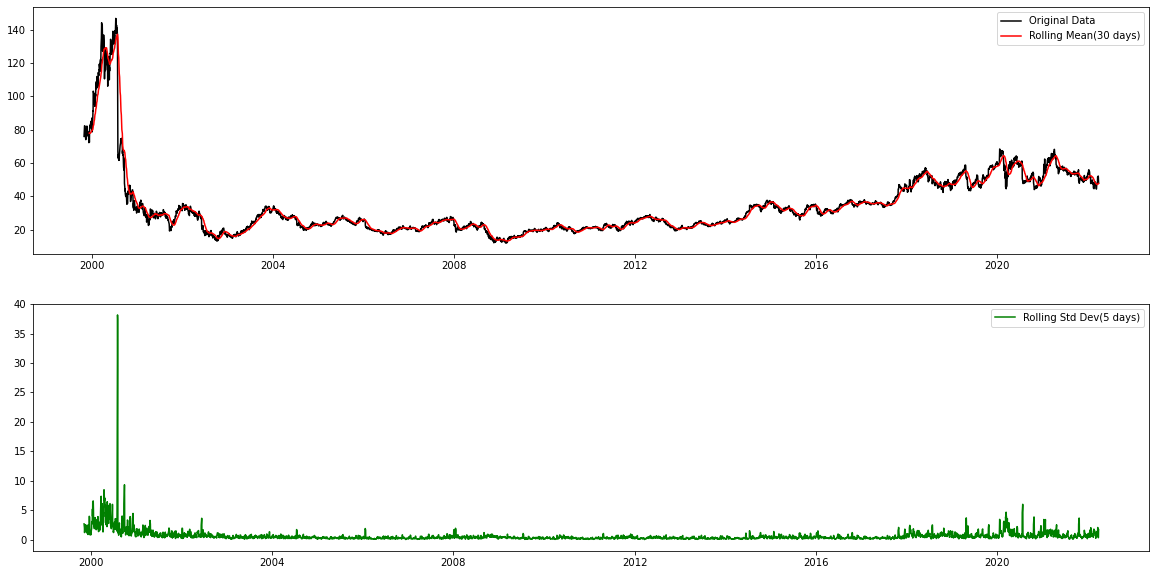

In [140]:
check_stationarity(df_close)

In [44]:
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

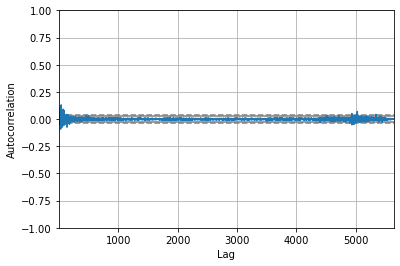

In [141]:
autocorrelation_plot(df_close.diff().dropna())

Dickey-Fuller test results

Test Statistic   -1.334321e+01
p-value           5.863946e-25
# of lags         3.200000e+01
# of obs          5.608000e+03
dtype: float64
Critical value at 1%: -3.43152
Critical value at 5%: -2.86206
Critical value at 10%: -2.56704


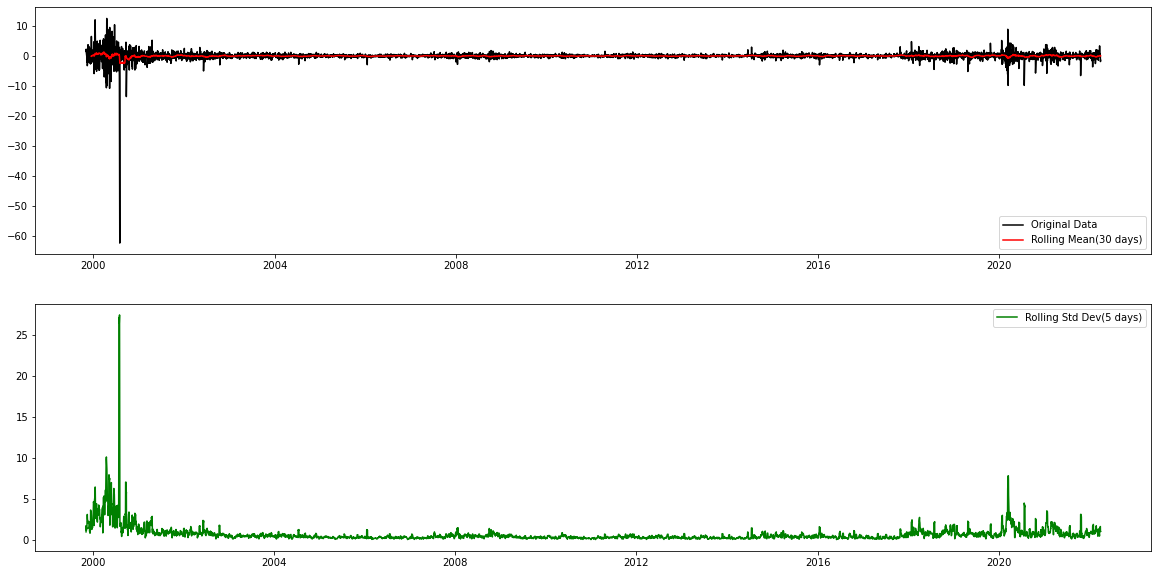

In [142]:
diff = df_close.diff().dropna()
check_stationarity(diff)

In [48]:
from statsmodels.graphics.tsaplots import plot_acf

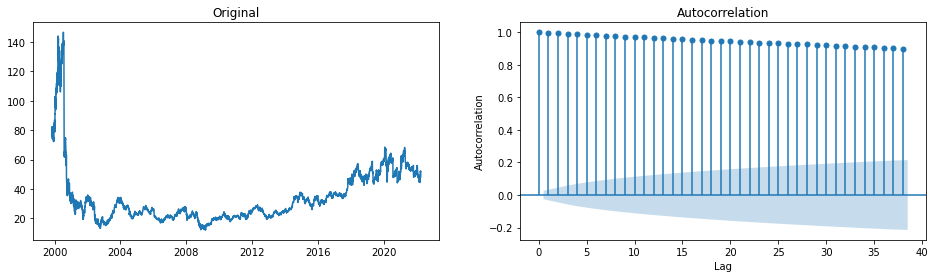

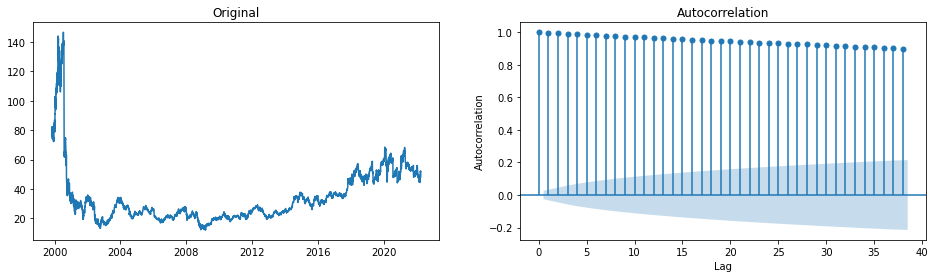

In [143]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(df_close)
ax1.set_title("Original")
ax2.set_ylabel("Autocorrelation")
ax2.set_xlabel("Lag")
# add ; at the end of the plot function so that the plot is not duplicated
plot_acf(df_close, ax=ax2)

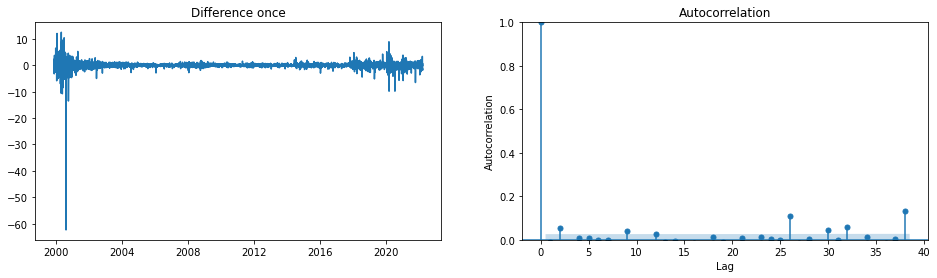

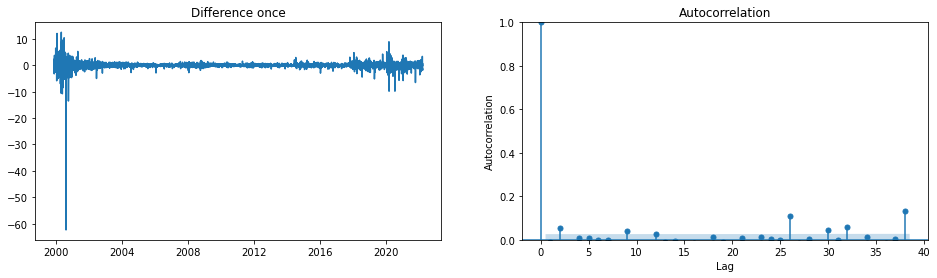

In [144]:
diff = df_close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)
ax2.set_ylabel("Autocorrelation")
ax2.set_xlabel("Lag")
plot_acf(diff, ax=ax2)

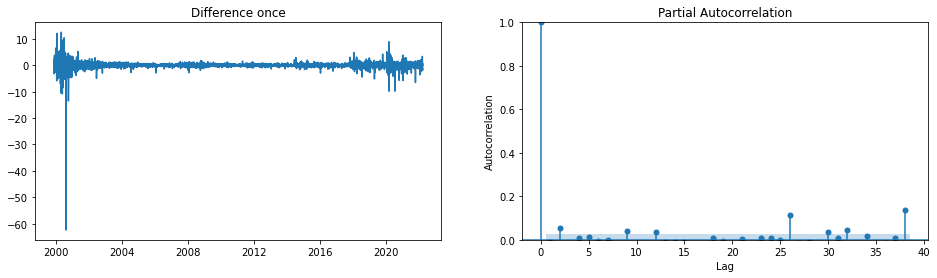

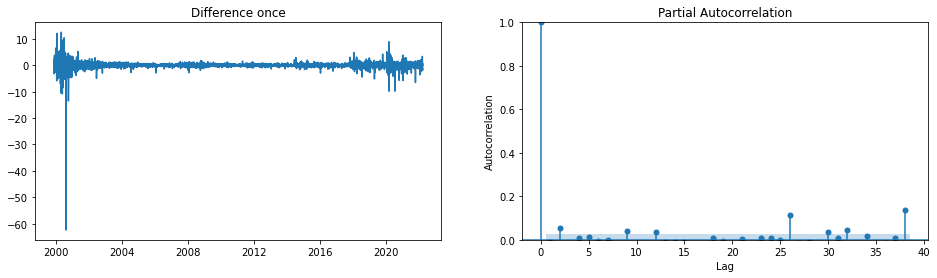

In [145]:
from statsmodels.graphics.tsaplots import plot_pacf
diff = df_close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)
ax2.set_ylabel("Autocorrelation")
ax2.set_xlabel("Lag")
plot_pacf(diff, ax=ax2)

p = 4

In [211]:
model = sm.tsa.arima.ARIMA(df_close, order=(26,1,9))

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [212]:
result = model.fit()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [213]:
result.conf_int()

,0,1
ar.L1,-0.145149,0.186777
ar.L2,-0.154946,0.093651
ar.L3,-0.702822,-0.532906
ar.L4,0.251314,0.585927
ar.L5,0.094197,0.402698
ar.L6,-0.021870,0.257685
ar.L7,0.298370,0.464211
ar.L8,0.116909,0.346134
ar.L9,-0.230207,-0.001147
ar.L10,-0.054726,-0.005921


In [214]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  close   No. Observations:                 5642
Model:                ARIMA(26, 1, 9)   Log Likelihood               -9523.030
Date:                Sun, 24 Apr 2022   AIC                          19118.059
Time:                        22:58:24   BIC                          19357.021
Sample:                             0   HQIC                         19201.302
                               - 5642                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0208      0.085      0.246      0.806      -0.145       0.187
ar.L2         -0.0306      0.063     -0.483      0.629      -0.155       0.094
ar.L3         -0.6179      0.043    -14.254      0.000      -0.703      -0.533
ar.L4          0.4186      0.085      4.904      0.000       0.251       0.586
ar.L5          0.2484      0.079      3.157      0.002       0.094       0.403
ar.L6          0.1179      0.071      1.653      0.098      -0.022       0.258
ar.L7          0.3813      0.042      9.012      0.000       0.298       0.464
ar.L8          0.2315      0.058      3.959      0.000       0.117       0.346
ar.L9         -0.1157      0.058     -1.980      0.048      -0.230      -0.001
ar.L10        -0.0303      0.012     -2.436      0.015      -0.055      -0.006
ar.L11        -0.0126      0.011     -1.098      0.272      -0.035       0.010
ar.L12         0.0535      0.010      5.228      0.000       0.033       0.074
ar.L13        -0.0393      0.014     -2.777      0.005      -0.067      -0.012
ar.L14        -0.0131      0.013     -0.971      0.332      -0.039       0.013
ar.L15         0.0346      0.013      2.746      0.006       0.010       0.059
ar.L16        -0.0337      0.014     -2.408      0.016      -0.061      -0.006
ar.L17        -0.0530      0.014     -3.856      0.000      -0.080      -0.026
ar.L18         0.0328      0.015      2.194      0.028       0.004       0.062
ar.L19        -0.0267      0.011     -2.429      0.015      -0.048      -0.005
ar.L20        -0.0614      0.012     -4.929      0.000      -0.086      -0.037
ar.L21         0.0458      0.014      3.322      0.001       0.019       0.073
ar.L22        -0.0089      0.014     -0.620      0.535      -0.037       0.019
ar.L23         0.0046      0.013      0.356      0.722      -0.021       0.030
ar.L24         0.0223      0.011      1.967      0.049    7.76e-05       0.045
ar.L25        -0.0112      0.010     -1.117      0.264      -0.031       0.008
ar.L26         0.1166      0.009     13.450      0.000       0.100       0.134
ma.L1         -0.0331      0.086     -0.387      0.699      -0.201       0.135
ma.L2          0.0967      0.063      1.524      0.128      -0.028       0.221
ma.L3          0.5883      0.044     13.497      0.000       0.503       0.674
ma.L4         -0.4145      0.085     -4.905      0.000      -0.580      -0.249
ma.L5         -0.2057      0.077     -2.665      0.008      -0.357      -0.054
ma.L6         -0.1814      0.068     -2.651      0.008      -0.315      -0.047
ma.L7         -0.3896      0.041     -9.590      0.000      -0.469      -0.310
ma.L8         -0.2538      0.059     -4.338      0.000      -0.369      -0.139
ma.L9          0.1460      0.059      2.494      0.013       0.031       0.261
sigma2         1.7145      0.008    222.412      0.000       1.699       1.730
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):         13490

In [269]:
last = round(len(df_close)*0.1)
# last = 1000
pred = result.predict(start=5641-last, end=5641)
last

564

In [270]:
pd.Series(pred)

timestamp
2020-01-07    59.748259
2020-01-08    58.926578
2020-01-09    58.818038
2020-01-10    59.177433
2020-01-13    58.925031
                ...    
2022-03-28    52.259278
2022-03-29    51.102765
2022-03-30    51.836515
2022-03-31    51.329170
2022-04-01    49.855159
Name: predicted_mean, Length: 565, dtype: float64

In [271]:
split_point = int(len(df)*0.8)
df_test = df_close[len(df)-1 - last:len(df)]
df_test = df_test.sort_values(by='timestamp')
len(df_test)

565

Text(0.5, 1.0, 'INTC Stock Price Prediction')

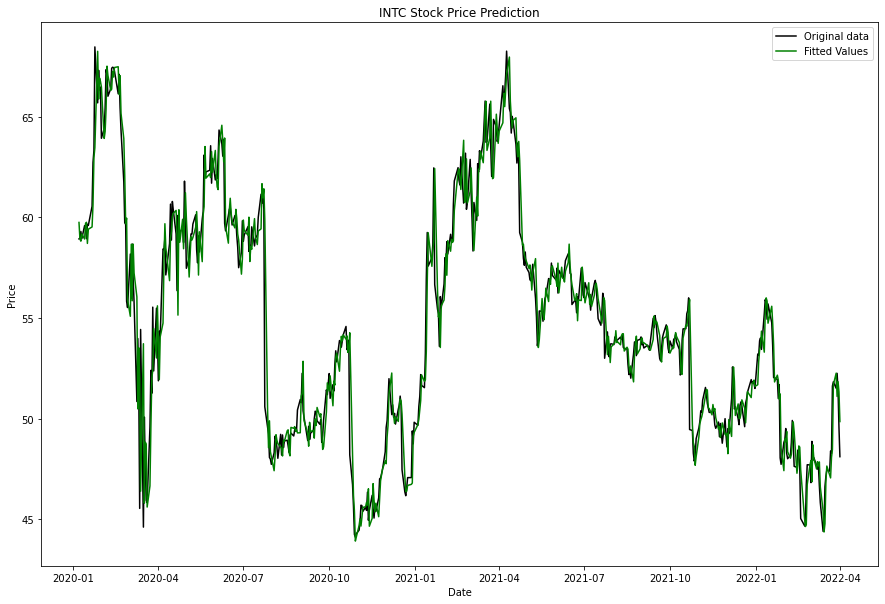

In [272]:
plt.figure(figsize=(15,10))
plt.plot(df_test, color='black', label='Original data')
plt.plot(pred, color='green', label='Fitted Values')
plt.legend()
plt.ylabel("Price")
plt.xlabel("Date")
plt.title('INTC Stock Price Prediction')

In [273]:

mse = mean_squared_error(df_test, pred)
rmse = mean_squared_error(df_test, pred, squared=False)
print(mse, rmse)

mae = mean_absolute_error(df_test, pred)
print(mae)

2.121024813126316 1.4563738576087926
0.9481158466136032


In [274]:
y_test = np.asarray(df_test['close'])
y_test

array([58.93 , 58.97 , 59.3  , 58.94 , 59.59 , 59.43 , 58.94 , 59.66 ,
       59.6  , 60.55 , 62.73 , 63.32 , 68.47 , 65.69 , 67.31 , 66.33 ,
       66.47 , 63.93 , 64.42 , 65.46 , 67.34 , 67.09 , 66.02 , 66.39 ,
       67.41 , 67.46 , 67.44 , 67.27 , 66.14 , 67.11 , 65.45 , 64.34 ,
       61.76 , 59.73 , 59.65 , 55.83 , 55.52 , 58.18 , 55.97 , 58.68 ,
       56.96 , 55.77 , 50.85 , 53.98 , 51.66 , 45.54 , 54.43 , 44.61 ,
       50.08 , 47.61 , 45.94 , 45.83 , 49.58 , 52.4  , 51.26 , 55.54 ,
       52.37 , 55.49 , 54.12 , 51.88 , 54.35 , 54.13 , 58.43 , 58.4  ,
       58.98 , 57.14 , 58.7  , 60.66 , 58.87 , 60.79 , 60.36 , 59.18 ,
       56.36 , 60.1  , 59.04 , 59.26 , 59.47 , 58.75 , 61.8  , 59.98 ,
       57.47 , 57.99 , 58.75 , 59.18 , 59.17 , 59.67 , 60.13 , 58.39 ,
       57.74 , 59.08 , 58.28 , 59.92 , 60.29 , 63.1  , 61.98 , 62.26 ,
       62.34 , 63.56 , 61.7  , 62.93 , 61.86 , 62.12 , 61.93 , 62.97 ,
       64.34 , 63.67 , 63.04 , 63.87 , 59.7  , 59.33 , 60.1  , 60.4  ,
      

In [275]:
y_pred = np.asarray(pred)
y_pred

array([59.74825853, 58.92657769, 58.81803825, 59.17743332, 58.92503071,
       59.69223297, 59.75469551, 58.70599658, 59.41380605, 59.5233199 ,
       60.6146819 , 62.97774769, 63.46420974, 68.25125435, 65.87721267,
       66.92627851, 66.75248016, 66.47944083, 63.92301415, 64.27417284,
       65.37574578, 67.51396485, 67.05029124, 66.31060953, 66.37236626,
       67.25505186, 66.97244478, 67.44684266, 67.48467951, 66.10335758,
       67.03998603, 65.17088782, 63.91133331, 62.05991966, 59.685063  ,
       59.96008022, 55.91354091, 55.08420772, 58.66321949, 55.85698254,
       58.67102617, 57.23304474, 56.04885757, 50.48557094, 53.52115157,
       51.97104229, 46.39114903, 53.72224767, 45.80246725, 48.83147292,
       48.74020654, 45.60702914, 46.65686398, 49.57296589, 51.99842068,
       52.40407636, 54.47680331, 53.01314177, 55.6051277 , 53.85616238,
       51.93963325, 54.06766421, 54.7477605 , 57.74847582, 59.68440553,
       58.48586918, 56.85667171, 58.96089375, 59.28879618, 60.04

In [278]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("mse", mse, "rmse", rmse)
mae = mean_absolute_error(y_test, y_pred)
print("mae",mae)
loss = log_loss(y_test, y_pred)
print("loss",loss)

mse 2.121024813126316 rmse 1.4563738576087926
mae 0.9481158466136032


ValueError: Unknown label type: (array([58.93 , 58.97 , 59.3  , 58.94 , 59.59 , 59.43 , 58.94 , 59.66 ,
       59.6  , 60.55 , 62.73 , 63.32 , 68.47 , 65.69 , 67.31 , 66.33 ,
       66.47 , 63.93 , 64.42 , 65.46 , 67.34 , 67.09 , 66.02 , 66.39 ,
       67.41 , 67.46 , 67.44 , 67.27 , 66.14 , 67.11 , 65.45 , 64.34 ,
       61.76 , 59.73 , 59.65 , 55.83 , 55.52 , 58.18 , 55.97 , 58.68 ,
       56.96 , 55.77 , 50.85 , 53.98 , 51.66 , 45.54 , 54.43 , 44.61 ,
       50.08 , 47.61 , 45.94 , 45.83 , 49.58 , 52.4  , 51.26 , 55.54 ,
       52.37 , 55.49 , 54.12 , 51.88 , 54.35 , 54.13 , 58.43 , 58.4  ,
       58.98 , 57.14 , 58.7  , 60.66 , 58.87 , 60.79 , 60.36 , 59.18 ,
       56.36 , 60.1  , 59.04 , 59.26 , 59.47 , 58.75 , 61.8  , 59.98 ,
       57.47 , 57.99 , 58.75 , 59.18 , 59.17 , 59.67 , 60.13 , 58.39 ,
       57.74 , 59.08 , 58.28 , 59.92 , 60.29 , 63.1  , 61.98 , 62.26 ,
       62.34 , 63.56 , 61.7  , 62.93 , 61.86 , 62.12 , 61.93 , 62.97 ,
       64.34 , 63.67 , 63.04 , 63.87 , 59.7  , 59.33 , 60.1  , 60.4  ,
       60.49 , 60.08 , 59.62 , 60.09 , 59.92 , 59.09 , 58.51 , 57.5  ,
       58.27 , 59.83 , 58.81 , 59.13 , 59.54 , 58.31 , 58.61 , 58.42 ,
       59.53 , 58.58 , 58.98 , 59.03 , 59.14 , 60.   , 61.15 , 60.7  ,
       61.05 , 60.4  , 50.59 , 49.57 , 49.24 , 48.07 , 47.99 , 47.73 ,
       48.3  , 49.13 , 48.92 , 48.57 , 48.03 , 49.22 , 48.19 , 49.19 ,
       48.56 , 48.89 , 48.93 , 48.65 , 48.33 , 49.17 , 49.28 , 49.14 ,
       49.43 , 49.55 , 49.4  , 50.43 , 50.95 , 50.79 , 52.25 , 50.39 ,
       50.08 , 48.91 , 49.62 , 48.96 , 49.28 , 49.41 , 50.   , 50.37 ,
       50.32 , 49.89 , 49.72 , 49.95 , 48.82 , 49.16 , 49.94 , 51.43 ,
       51.19 , 51.78 , 52.24 , 51.01 , 51.69 , 51.37 , 52.67 , 53.37 ,
       52.82 , 53.88 , 53.83 , 53.55 , 53.85 , 54.16 , 54.58 , 53.43 ,
       53.5  , 53.9  , 48.2  , 46.72 , 45.64 , 44.25 , 44.11 , 44.28 ,
       44.46 , 44.85 , 45.7  , 45.68 , 45.39 , 45.6  , 45.44 , 46.35 ,
       44.95 , 45.46 , 46.19 , 45.53 , 45.06 , 45.62 , 45.39 , 46.06 ,
       47.01 , 47.05 , 47.45 , 48.35 , 49.56 , 49.9  , 50.99 , 51.985,
       50.2  , 50.69 , 50.07 , 50.26 , 49.73 , 50.47 , 50.665, 51.12 ,
       50.65 , 47.46 , 46.36 , 46.17 , 46.57 , 47.07 , 47.07 , 49.39 ,
       48.75 , 49.82 , 49.67 , 50.61 , 51.1  , 52.19 , 51.65 , 51.54 ,
       53.24 , 56.95 , 59.25 , 57.58 , 57.99 , 58.67 , 62.46 , 56.66 ,
       55.44 , 55.21 , 53.59 , 56.065, 55.51 , 56.69 , 58.   , 57.68 ,
       58.79 , 58.18 , 59.16 , 58.78 , 58.86 , 60.66 , 61.81 , 62.47 ,
       61.85 , 61.61 , 63.01 , 60.71 , 61.12 , 63.19 , 60.4  , 60.78 ,
       62.88 , 61.24 , 59.9  , 58.33 , 60.74 , 59.85 , 62.67 , 62.25 ,
       63.31 , 62.9  , 63.79 , 64.78 , 65.78 , 63.725, 63.76 , 65.63 ,
       63.48 , 62.04 , 62.02 , 64.87 , 64.5  , 63.77 , 64.   , 64.55 ,
       66.54 , 65.56 , 66.25 , 67.05 , 68.26 , 65.405, 65.22 , 64.19 ,
       65.02 , 64.75 , 63.63 , 62.7  , 63.7  , 62.57 , 59.24 , 58.76 ,
       57.97 , 57.62 , 58.28 , 57.53 , 57.26 , 56.9  , 56.85 , 57.19 ,
       57.67 , 55.97 , 55.04 , 53.62 , 54.01 , 55.35 , 55.33 , 54.84 ,
       55.36 , 55.95 , 56.08 , 56.96 , 56.87 , 56.92 , 57.73 , 57.12 ,
       56.89 , 57.48 , 56.24 , 57.37 , 57.09 , 57.   , 57.   , 57.38 ,
       57.85 , 58.19 , 57.99 , 57.22 , 57.18 , 55.67 , 55.87 , 55.87 ,
       55.26 , 56.07 , 55.91 , 57.48 , 56.75 , 56.14 , 56.01 , 56.76 ,
       56.09 , 55.96 , 55.39 , 55.99 , 56.73 , 56.87 , 56.52 , 55.81 ,
       54.97 , 54.64 , 55.24 , 56.23 , 55.96 , 53.   , 54.31 , 53.18 ,
       53.07 , 53.7  , 53.72 , 53.68 , 54.06 , 53.9  , 53.89 , 53.92 ,
       54.05 , 53.94 , 54.14 , 53.54 , 53.49 , 53.47 , 52.69 , 52.19 ,
       52.44 , 52.01 , 53.23 , 53.81 , 53.81 , 53.13 , 53.89 , 53.94 ,
       54.06 , 53.67 , 53.73 , 53.51 , 53.65 , 53.57 , 53.4  , 53.84 ,
       54.99 , 54.52 , 55.12 , 54.83 , 54.26 , 52.98 , 52.87 , 53.5  ,
       54.03 , 54.22 , 54.66 , 54.   , 53.49 , 53.28 , 53.86 , 53.47 ,
       53.95 , 53.98 , 54.18 , 53.81 , 53.44 , 52.17 , 52.26 , 53.9  ,
       54.46 , 54.47 , 55.21 , 55.37 , 56.   , 49.46 , 49.41 , 48.28 ,
       47.89 , 48.08 , 49.   , 49.55 , 49.86 , 50.39 , 50.31 , 50.92 ,
       51.55 , 51.2  , 50.76 , 50.53 , 50.31 , 50.32 , 50.61 , 50.23 ,
       49.68 , 49.52 , 49.83 , 49.1  , 49.76 , 48.78 , 50.   , 49.2  ,
       48.6  , 49.5  , 49.25 , 50.99 , 52.57 , 51.75 , 50.48 , 50.59 ,
       50.   , 49.7  , 50.67 , 50.83 , 50.62 , 49.6  , 50.77 , 50.97 ,
       51.31 , 51.94 , 51.76 , 51.83 , 51.74 , 51.5  , 53.21 , 53.14 ,
       53.87 , 54.01 , 53.44 , 55.21 , 55.91 , 55.74 , 54.94 , 55.7  ,
       54.76 , 53.62 , 52.04 , 52.04 , 51.94 , 51.   , 51.69 , 48.05 ,
       47.73 , 48.82 , 48.95 , 49.51 , 48.28 , 48.01 , 48.18 , 48.81 ,
       49.91 , 48.86 , 47.63 , 47.58 , 48.44 , 48.23 , 47.57 , 45.04 ,
       44.69 , 44.65 , 46.72 , 47.71 , 47.7  , 46.82 , 48.87 , 47.93 ,
       48.07 , 47.68 , 47.5  , 47.63 , 46.66 , 45.83 , 44.4  , 44.81 ,
       46.63 , 47.14 , 47.45 , 47.39 , 48.39 , 48.27 , 51.62 , 51.83 ,
       51.51 , 52.25 , 51.43 , 49.56 , 48.11 ]),)